# 一层全链接隐藏层的Embedding(无激活函数)
- 数据来源:keras.datasets.mnist.load_data() ， 28$\times$28的单通道图片


In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

(60000, 784)
(10000, 784)
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.3590 - val_loss: 0.2711
Epoch 2/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.2642 - val_loss: 0.2541
Epoch 3/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.2433 - val_loss: 0.2306
Epoch 4/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.2218 - val_loss: 0.2114
Epoch 5/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.2063 - val_loss: 0.1989
Epoch 6/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.1957 - val_loss: 0.1900
Epoch 7/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.1877 - val_loss: 0.1827
Epoch 8/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.1810 - val_loss: 0.1767
Epoch 9/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.175

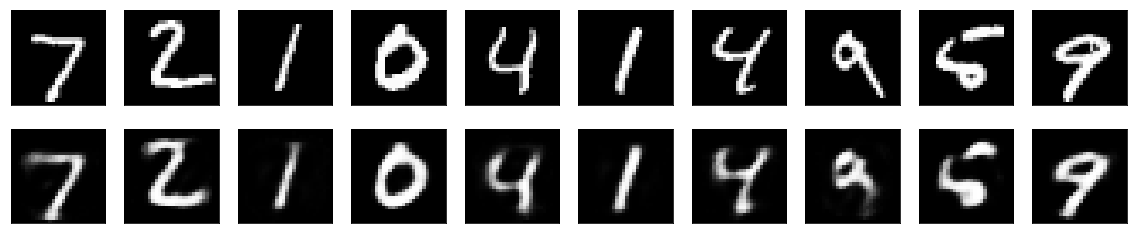

In [3]:

 
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)
 
encoding_dim = 32
input_img = Input(shape=(784,))
 
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
 
autoencoder = Model(inputs=input_img, outputs=decoded)
encoder = Model(inputs=input_img, outputs=encoded)
 
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
 
decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))
 
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
 
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, 
                shuffle=True, validation_data=(x_test, x_test))
 
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
 
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
 
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()



In [4]:
index_0=np.argwhere(y_test==0).reshape(-1,)
index_1=np.argwhere(y_test==1).reshape(-1,)
index_2=np.argwhere(y_test==2).reshape(-1,)
index_3=np.argwhere(y_test==3).reshape(-1,)
index_4=np.argwhere(y_test==4).reshape(-1,)
